<a href="https://colab.research.google.com/github/chxnmay17/SPPU-ML-Laboratory/blob/main/pract2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Successfully loaded 'emails.csv' from sidebar ---

--- Data Head ---
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 300

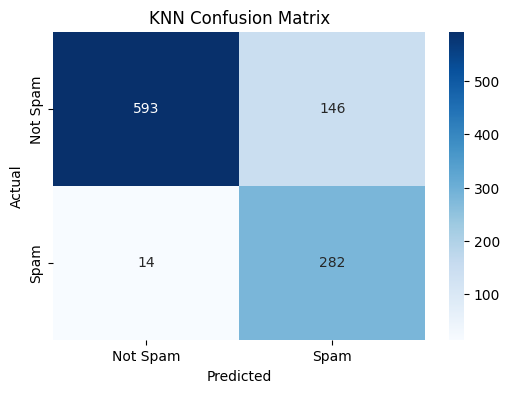


================= SVM Performance Analysis ==================
Accuracy: 0.9469

Classification Report:
              precision    recall  f1-score   support

Not Spam (0)       0.97      0.96      0.96       739
    Spam (1)       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



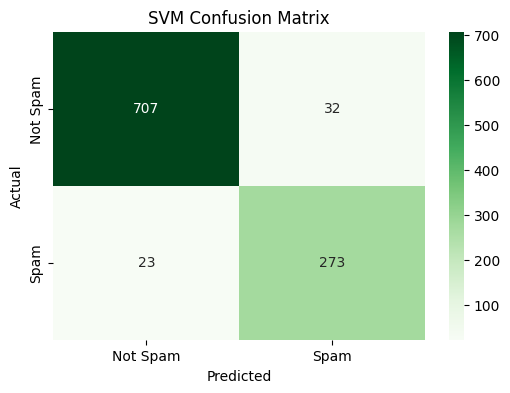


================= Model Comparison ==================
KNN Accuracy:   0.8454
SVM Accuracy:   0.9469

SVM performed better than KNN.


In [21]:
# -----------------------------------------------------------------
# STEP 1: IMPORT LIBRARIES AND LOAD DATA
# -----------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Try to read the file.
# This assumes you have uploaded 'emails.csv' using the
# Colab file explorer sidebar.
try:
    df = pd.read_csv('emails.csv')
    print("--- Successfully loaded 'emails.csv' from sidebar ---")
except FileNotFoundError:
    print("Error: 'emails.csv' not found.")
    print("Please make sure you have uploaded the file using the 'Files' icon in the left sidebar.")
    # Stop execution if file isn't loaded
    raise
except Exception as e:
    print(f"An error occurred: {e}")
    raise

# -----------------------------------------------------------------
# STEP 2: DATA EXPLORATION AND PREPROCESSING
# -----------------------------------------------------------------
print("\n--- Data Head ---")
print(df.head())

# Define features (X) and target (y)
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# -----------------------------------------------------------------
# STEP 3: SPLIT AND SCALE THE DATA
# -----------------------------------------------------------------
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Data successfully split and scaled ---")

# -----------------------------------------------------------------
# STEP 4: MODEL 1 - K-NEAREST NEIGHBORS (KNN)
# -----------------------------------------------------------------
print("\n--- Training K-Nearest Neighbors (KNN) ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
# -------------------------------------------------
# !!! THIS IS THE CORRECTED LINE !!!
# We predict on the 'X_test_scaled' data, not the training data
# -------------------------------------------------
y_pred_knn = knn.predict(X_test_scaled)

# -----------------------------------------------------------------
# STEP 5: MODEL 2 - SUPPORT VECTOR MACHINE (SVM)
# -----------------------------------------------------------------
print("\n--- Training Support Vector Machine (SVM) ---")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

print("\n--- Model Training Complete ---")

# -----------------------------------------------------------------
# STEP 6: PERFORMANCE ANALYSIS
# -----------------------------------------------------------------

print("\n================= KNN Performance Analysis ==================")
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Not Spam (0)', 'Spam (1)']))

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\n================= SVM Performance Analysis ==================")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Not Spam (0)', 'Spam (1)']))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------------------------------------------
# STEP 7: FINAL COMPARISON
# -----------------------------------------------------------------
print("\n================= Model Comparison ==================")
print(f"KNN Accuracy:   {knn_accuracy:.4f}")
print(f"SVM Accuracy:   {svm_accuracy:.4f}")

if svm_accuracy > knn_accuracy:
    print("\nSVM performed better than KNN.")
elif knn_accuracy > svm_accuracy:
    print("\nKNN performed better than SVM.")
else:
    print("\nKNN and SVM performed equally well.")